In [162]:
import importlib
import random
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')

import functions
functions = importlib.reload(functions)

In [128]:
def converged(states):
    return len(np.unique(states)) == 1

def simulate_bd(n_agents, 
                fitnesses, 
                phenotype_duration,
                init_environment,
                environment_duration):
    
    phenotype_states = np.zeros(n_agents).astype(int)
    mutation_states = np.zeros(n_agents).astype(int)
    mutation_states[0] = 1  # initial mutation
    time_to_mutation = np.zeros(n_agents)
    time_to_mutation[0] = phenotype_duration() 
    environment = init_environment
    time_to_switch = environment_duration()

    iter_count = 0
    while not converged(mutation_states):
        # Check for environment switch
        if time_to_switch <= 0:
            environment = 1 - environment
            time_to_switch = environment_duration()
            
        for i in range(n_agents):
            if mutation_states[i] == 1 and time_to_mutation[i] <= 0:
                phenotype_states[i] = 1 - phenotype_states[i]
                time_to_mutation[i] = phenotype_duration()

        # Get agent fitnesses in the current environment
        fitness_landscape = fitnesses[environment]
        weights = np.array([fitness_landscape[state] for state in phenotype_states])
        
        # Choose agent to birth based on fitness
        idx = list(range(n_agents))
        birth_node = random.choices(idx, weights=weights)[0]

        # Uniformly choose a different agent to die
        idx.remove(birth_node)
        death_node = random.choice(idx)

        # Update agent states
        phenotype_states[death_node] = phenotype_states[birth_node]
        mutation_states[death_node] = mutation_states[birth_node]
        if mutation_states[death_node] == 1:
            time_to_mutation[death_node] = phenotype_duration()
        else:
            time_to_mutation[death_node] = 0
        
        # Update timestep
        time_to_switch -= 1
        time_to_mutation[mutation_states == 1] -= 1
        iter_count +=1

    mutant_freq = np.mean(mutation_states)
    return mutant_freq

In [174]:
# environment_duration = lambda: np.random.gamma(25, 25) + 1
environment_duration = lambda: np.random.gamma(3, 3) + 1
phenotype_duration = lambda: np.random.gamma(3, 3) + 1
s = .5
fitnesses = [[1, 1+s],[1+s, 1]]
n_agents = 10

s_data = []
for s in np.logspace(-2,2,50):
    fitnesses = [[1, 1+s],[1+s, 1]]
    phenotype_duration = lambda: np.random.gamma(.1, .1) + 1
    mutant_freqs = []
    for _ in range(100):
        init_environment = random.randint(0, 1)
        mutant_freq = simulate_bd(n_agents, 
                                  fitnesses, 
                                  phenotype_duration,
                                  init_environment, 
                                  environment_duration)
        mutant_freqs.append(mutant_freq)
    s_data.append(np.mean(mutant_freqs))
    
# scale_data = []
# for scale in np.logspace(-2,1,50):
#     phenotype_duration = lambda: np.random.gamma(1, scale) + 1
#     mutant_freqs = []
#     for _ in range(100):
#         init_environment = random.randint(0, 1)
#         mutant_freq = simulate_bd(n_agents, 
#                                   fitnesses, 
#                                   phenotype_duration,
#                                   init_environment, 
#                                   environment_duration)
#         mutant_freqs.append(mutant_freq)
#     scale_data.append(np.mean(mutant_freqs))

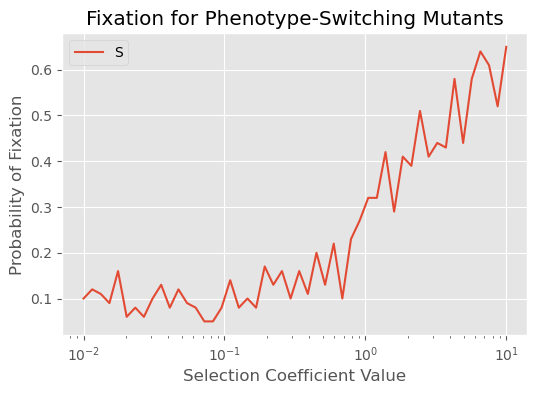

In [176]:
# use mpl.style.use('ggplot')
plt.figure(dpi=100)
plt.plot(np.logspace(-2,1,50), s_data, label=r'S')
# plt.plot(np.logspace(-2,1,50), scale_data, label=r'Scale ($\theta$)')
plt.legend()
plt.xscale('log')
plt.xlabel('Selection Coefficient Value')
plt.ylabel('Probability of Fixation')
plt.title('Fixation for Phenotype-Switching Mutants')
plt.savefig('fitness_s_quick.png', dpi=100)

plt.show()

In [101]:
np.random.gamma(2, 2)

4.741198056812688

In [159]:
np.logspace(-2,1,25)

array([ 0.01      ,  0.01333521,  0.01778279,  0.02371374,  0.03162278,
        0.04216965,  0.05623413,  0.07498942,  0.1       ,  0.13335214,
        0.17782794,  0.23713737,  0.31622777,  0.4216965 ,  0.56234133,
        0.74989421,  1.        ,  1.33352143,  1.77827941,  2.37137371,
        3.16227766,  4.21696503,  5.62341325,  7.49894209, 10.        ])